In [550]:
import pandas as pd
file = pd.read_csv('../data/cleaned_complete.csv').drop(['Unnamed: 0','Unnamed: 0.1','index','dateUpdated','dateListed','geoLocation','geometry', 'index_right', 'SA2_maincode_2021','Population Increase','Earners (persons)','Median age of earners (years)','Male','Female',	'Person','Male Ratio','Female Ratio','Sum ($)','Mean ($)','Median ($)'],axis = 1)

In [549]:
postcode_count = pd.DataFrame(file['postcode'].value_counts()).reset_index().rename({"index":"postcode",'postcode':'count'},axis = 1)

In [547]:
median_price = file.groupby(['bathrooms', 'bedrooms', 'carspaces','year','postcode'],as_index = False)['rent'].median('rent')

In [408]:
median_rent = dict()
for index, values in median_price.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    median_rent[key] = values['rent']

In [409]:
values_list = []
for item,values in file.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    hit = median_rent[key]
    values_list.append(hit)

In [410]:
file['median_rent'] = values_list 

In [411]:
def get_absolute(data):
    if data > 0 :
        return data
    else:
        return (-1)* data

In [412]:
file['gap'] = file['rent'] - file['median_rent']

In [427]:
file = file[file['rent'] <= 1.3 * file['median_rent']]

,propertyTypes,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,surburb,year,month,price,...,university,garden,park,playground,pitch,offence count,incidents recorded,Population,median_rent,gap
0,['apartmentUnitFlat'],1.0,1.0,0.0,NaN,3205,south melbourne,2019,1,$360.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,790.0,-430.0
1,['house'],2.0,2.0,1.0,NaN,3205,south melbourne,2019,1,$725.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,565.0,160.0
2,['apartmentUnitFlat'],1.0,2.0,0.0,NaN,3205,south melbourne,2019,1,$500.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,570.0,-70.0
5,['house'],3.0,3.0,1.0,NaN,3205,south melbourne,2019,1,$800.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,750.0,50.0
6,['apartmentUnitFlat'],2.0,2.0,2.0,NaN,3205,south melbourne,2019,1,$650.00 per week,...,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,550.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,['house'],1.0,3.0,1.0,NaN,3701,dartmouth,2022,5,$280,...,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0,-220.0
100635,['house'],1.0,3.0,1.0,NaN,3701,dartmouth,2022,6,$290,...,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0,-210.0
100636,['house'],1.0,3.0,2.0,NaN,3700,tallangatta,2022,8,$470,...,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6181.185987,500.0,-30.0
100637,['house'],1.0,3.0,2.0,NaN,3700,tallangatta,2021,3,$310 per week,...,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6153.000000,490.0,-180.0


In [551]:
data_list = []
for name, group in file.groupby(['postcode','year','month'],as_index = False):
    rent_median = group['rent'].median()
    bus_count = group['count of bus stop'].mean()
    train_count = group['count of train stop'].mean()
    tram_count = group['count of tram stop'].mean()
    vline_count = group['count of vline stop'].mean()
    school_count = group['count of school'].mean()
    bench_count = group['bench'].mean()
    cafe_count = group['cafe'].mean()
    child_care_count = group['childcare'].mean()
    fast_food_count = group['fast_food'].mean()
    kindergarten_count = group['kindergarten'].mean()
    parking_count = group['parking'].mean()
    restaurant_count = group['restaurant'].mean()
    school_count = group['school'].mean()
    university_count = group['university'].mean()
    park_count = group['park'].mean()
    playground_count = group['playground'].mean()
    pitch_count = group['pitch'].mean()
    garden_count = group['garden'].mean()
    offence_count = group['offence count'].mean()
    incidents_recorded_count = group[ 'incidents recorded'].mean()
    shopping_mall_count = group['count of shopping mall'].mean()
    bus_distance = group['distance of the closest bus stop'].mean()
    train_distance  = group['distance of the closest train stop'].mean()
    vline_distance  = group['distance of the closest vline stop'].mean()
    tram_distance  = group['distance of the closest tram stop'].mean()
    mall_distance  = group['distance to the closest shopping mall'].mean()
    school_distance  = group['distance of the closest school'].mean()
    data_list.append((name[0],name[1],name[2],bus_count,train_count,tram_count,vline_count,school_count,bench_count,cafe_count,child_care_count,fast_food_count,kindergarten_count
    ,parking_count,restaurant_count,school_count,university_count,park_count,playground_count,pitch_count,garden_count,offence_count,
    incidents_recorded_count,shopping_mall_count,bus_distance,train_distance,vline_distance,tram_distance,mall_distance, school_distance,rent_median))



In [552]:
data_df = pd.DataFrame(data_list,columns=['postcode','year','month','bus_count','train_count','tram_count','vline_count','school_count','bench_count','cafe_count', 'child_care_count', 'fast_food_count', 'kindergarten_count'
    ,'parking_count','restaurant_count','school_count','university_count','park_count','playground_count','pitch_count','garden_count','offence_count',
    'incidents_recorded_count','shopping_mall_count',
    'bus_distance','train_distance','vline_distance','tram_distance','mall_distance', 'school_distance','rent_median'])

In [553]:
data_df

,postcode,year,month,bus_count,train_count,tram_count,vline_count,school_count,bench_count,cafe_count,...,offence_count,incidents_recorded_count,shopping_mall_count,bus_distance,train_distance,vline_distance,tram_distance,mall_distance,school_distance,rent_median
0,3000,2019,1,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,161725.0,125561.0,26.0,0.448438,NaN,0.446033,0.447180,0.262038,0.446747,570.0
1,3000,2019,2,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,161725.0,125561.0,26.0,0.448711,NaN,0.446309,0.447463,0.261997,0.447051,540.0
2,3000,2019,3,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,161725.0,125561.0,26.0,0.449038,NaN,0.446639,0.447797,0.262132,0.447398,530.0
3,3000,2019,4,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,161725.0,125561.0,26.0,0.448129,NaN,0.445724,0.446872,0.261735,0.446440,550.0
4,3000,2019,5,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,161725.0,125561.0,26.0,0.447490,NaN,0.445091,0.446250,0.260625,0.445851,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,3984,2019,6,18.0,0.0,0.0,8.0,3.0,5.0,1.0,...,4215.0,3058.0,0.0,1.050011,NaN,1.034391,NaN,NaN,1.041315,600.0
11262,3984,2019,9,18.0,0.0,0.0,8.0,3.0,5.0,1.0,...,4215.0,3058.0,0.0,1.061120,NaN,1.045534,NaN,NaN,1.052462,290.0
11263,3984,2021,2,18.0,0.0,0.0,8.0,3.0,5.0,1.0,...,4215.0,3058.0,0.0,0.999686,NaN,1.026205,NaN,NaN,1.033668,400.0
11264,3984,2021,4,18.0,0.0,0.0,8.0,3.0,5.0,1.0,...,4215.0,3058.0,0.0,1.075916,NaN,1.059396,NaN,NaN,1.066311,360.0


In [558]:
population = pd.read_csv('../data/population_forcasting.csv')

In [ ]:
population_count = dict()
population['Postcode'] = population['Postcode'].fillna(value=0)
for index, value in population.iterrows():
    postcode = int(value['Postcode'])
    year = value['year']
    key = str(postcode)+ ' ' + str(year)
    print(key)
    population_count[key] = value['Total']

In [560]:
population_list = []
for index, value in data_df.iterrows():
    postcode = value['postcode']
    year = value['year']
    key = str(postcode)+ ' ' + str(year)
    try:
        count = population_count[key]
        population_list.append(count)
    except:
        population_list.append(None)
data_df['population'] = population_list

In [ ]:
data_df

In [562]:
cpi_combined_df = pd.read_csv('../data/cpi_df.csv')
cpi_combined_df = cpi_combined_df.set_index(['month','year'])
cpi_combined_df 

,,Consumer_price_index
month,year,
8,2018,1.9
9,2018,1.9
10,2018,1.9
11,2018,1.8
12,2018,1.8
...,...,...
8,2024,3.5
9,2024,3.5
10,2024,3.0


In [563]:
#个数不同
merged_data = data_df.join(cpi_combined_df, on = ['month','year'],how = 'left').reset_index()
merged_data = pd.merge(merged_data,postcode_count,left_on='postcode',right_on = 'postcode', how = 'left').rename({'count':'house_count'},axis = 1)

In [564]:
merged_data.columns

Index(['index', 'postcode', 'year', 'month', 'bus_count', 'train_count',
       'tram_count', 'vline_count', 'school_count', 'bench_count',
       'cafe_count', 'child_care_count', 'fast_food_count',
       'kindergarten_count', 'parking_count', 'restaurant_count',
       'school_count', 'university_count', 'park_count', 'playground_count',
       'pitch_count', 'garden_count', 'offence_count',
       'incidents_recorded_count', 'shopping_mall_count', 'bus_distance',
       'train_distance', 'vline_distance', 'tram_distance', 'mall_distance',
       'school_distance', 'rent_median', 'population', 'Consumer_price_index',
       'house_count'],
      dtype='object')

In [565]:
merged_data = merged_data.fillna(0)

In [566]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
X = merged_data.drop('rent_median',axis=1)
y = merged_data['rent_median']

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [568]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [569]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_std, y_train)
regr.score(X_test_std, y_test)

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4792581232919406

In [543]:
xgbc = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators = 20,
    seed = 27,
    verbosity = 1
)

xgbc.fit(
    X_train_std, 
    y_train, 
    eval_set = [(X_train_std, y_train), (X_test_std, y_test)]
)
fea_imp = xgbc.feature_importances_
print(fea_imp)


[0]	validation_0-rmse:409.49136	validation_1-rmse:408.01870
[1]	validation_0-rmse:370.48543	validation_1-rmse:369.15505
[2]	validation_0-rmse:335.53347	validation_1-rmse:334.30587
[3]	validation_0-rmse:304.12995	validation_1-rmse:302.89403
[4]	validation_0-rmse:276.02036	validation_1-rmse:275.00727
[5]	validation_0-rmse:250.93100	validation_1-rmse:249.93023
[6]	validation_0-rmse:228.55209	validation_1-rmse:227.65779
[7]	validation_0-rmse:208.56416	validation_1-rmse:207.87422
[8]	validation_0-rmse:190.78100	validation_1-rmse:190.22426
[9]	validation_0-rmse:174.98488	validation_1-rmse:174.57710
[10]	validation_0-rmse:160.95262	validation_1-rmse:160.69471
[11]	validation_0-rmse:148.62525	validation_1-rmse:148.55321
[12]	validation_0-rmse:137.63744	validation_1-rmse:137.83041
[13]	validation_0-rmse:128.03475	validation_1-rmse:128.42516
[14]	validation_0-rmse:119.43553	validation_1-rmse:120.02956
[15]	validation_0-rmse:112.13250	validation_1-rmse:112.94394
[16]	validation_0-rmse:105.31292	v

In [382]:
import numpy as np
predicted_result = np.array(xgbc.predict(X_test))
gap = pd.DataFrame(predicted_result - np.array(y_test),columns = ['gap_values'])
gap_absoulte = gap['gap_values'].apply(get_absolute).sort_values(ascending = False)

In [383]:
gap_absoulte = gap['gap_values'].apply(get_absolute).sort_values(ascending = False)

In [384]:
gap_absoulte

923      593.189880
7622     515.529602
6689     486.518127
11361    440.417664
6164     412.196442
            ...    
2210       0.155563
4312       0.100098
2152       0.088898
263        0.075256
601        0.028687
Name: gap_values, Length: 13295, dtype: float64

<Axes:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

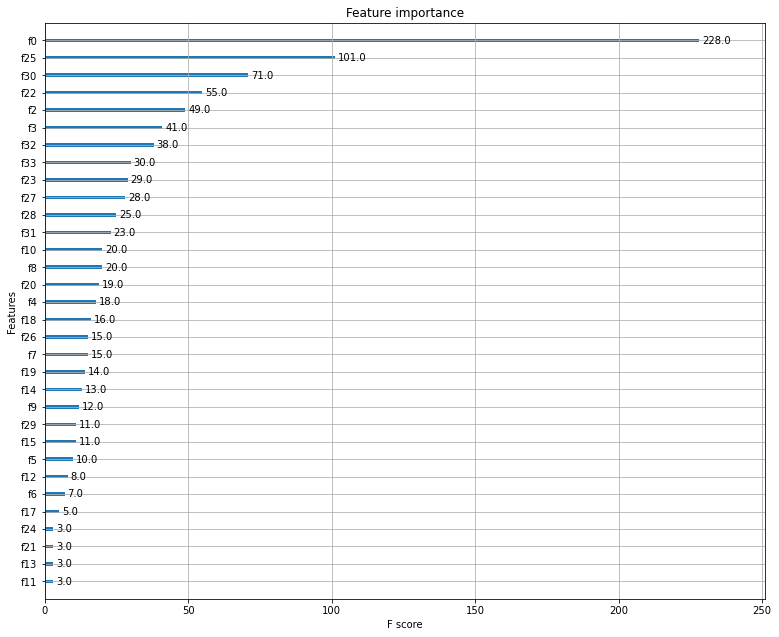

In [544]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 8))
ax = fig.add_axes([0,0,1,1])
xgb.plot_importance(xgbc, ax)

1. 尝试其他模型 (logistic)
2. take out data that is wrongly predicted and analyze these data
3. 每个postcode 同一房型 同一年份 算房子价格中位数 差距太大算脏数据